In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller,acf,pacf 
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima import auto_arima 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm 
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

## Reading Train and Test data

In [2]:
df = pd.read_csv(r'C:\Users\anant\Downloads\DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv', index_col='date',parse_dates=True)
print(len(df))
df

1462


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [3]:
df1 = pd.read_csv(r'C:\Users\anant\Downloads\DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv', index_col='date',parse_dates=True)
print(df1)
len(df1)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333
...               ...        ...         ...           ...
2017-04-20  34.500000  27.500000    5.562500    998.625000
2017-04-21  34.250000  39.375000    6.962500    999.875000
2017-04-22  32.900000  40.900000    8.890000   1001.600000
2017-04-23  32.875000  27.500000    9.962500   1002.125000
2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 4 columns]


114

## Data Exploration

<AxesSubplot:xlabel='date'>

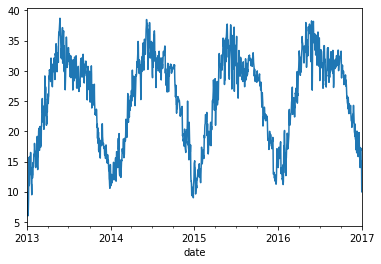

In [4]:
df['meantemp'].plot()

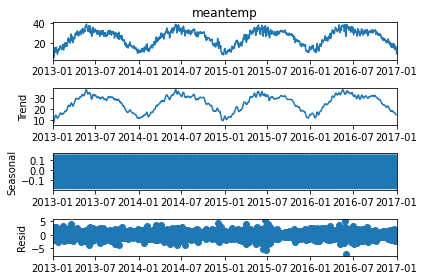

In [5]:
seasonal_decompose(df['meantemp']).plot();

### Seasonality is observed but no trend

## Check for stationarity

In [6]:
def checkStationarity(data):
    pvalue = adfuller(data)[1] 
    ''' output:-> 1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations ''' 
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue) 
    else:
        msg='p-value={}. Data is stationary'.format(pvalue) 
    return(msg)

In [7]:
checkStationarity(df['meantemp'])

'p-value=0.27741213723016056. Data is not stationary'

### Observation:
As the data is not stationary shifting of the data is done

### Data Shifting

In [8]:
# difference the data by 1
df['diff_1'] = diff(df['meantemp'],k_diff=1)

In [9]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,diff_1
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [10]:
checkStationarity(df['diff_1'].dropna())

'p-value=2.7648631375945265e-29. Data is stationary'

## Plotting ACF and PACF

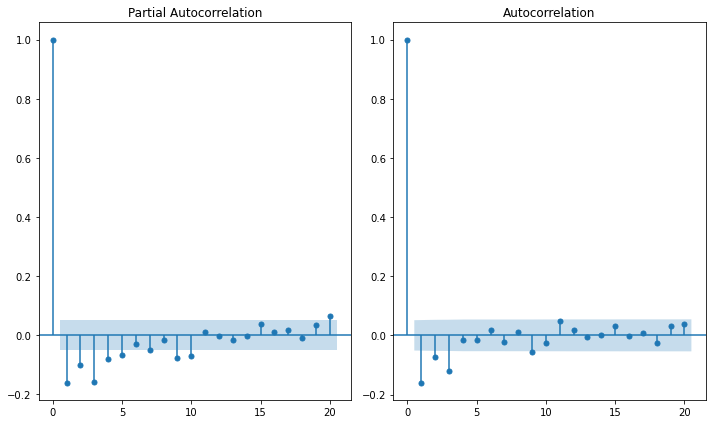

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,6)) 

# plot PACF (p) 
plot_pacf(df['diff_1'].dropna(),lags=20,ax=ax[0])
 
# plot ACF (q)  
plot_acf(df['diff_1'].dropna(),lags=20,ax=ax[1])

plt.tight_layout()

# ARIMA Model

Auto ARIMA (to help in the selection of p,d,q) helps in selecting best model

In [12]:
m1 = auto_arima(df['meantemp'],start_p=1,max_p=3, start_q=1,max_q=3, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [13]:
p=1; d=1; q=1 
m111 = ARIMA(df['meantemp'],order=(p,d,q)).fit()
print(m111.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.239
Date:                Wed, 02 Feb 2022   AIC                           5542.478
Time:                        14:53:30   BIC                           5558.339
Sample:                    01-01-2013   HQIC                          5548.395
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.0

### Predict the test data using the model

In [14]:
start = len(df) 
end = len(df) + len(df1) - 1 
print('start = {}, end = {}'.format(start,end)) 
predictions = m111.predict(start,end,typ='levels')
print(predictions)

start = 1462, end = 1575
2017-01-02    11.354415
2017-01-03    12.130205
2017-01-04    12.574566
2017-01-05    12.829089
2017-01-06    12.974876
                ...    
2017-04-21    13.170340
2017-04-22    13.170340
2017-04-23    13.170340
2017-04-24    13.170340
2017-04-25    13.170340
Freq: D, Name: predicted_mean, Length: 114, dtype: float64


### Collate actual, predicted, and error values

In [15]:
actual = []; 
pred = [] 
for i in range(len(predictions)):
    actual.append(df1['meantemp'][i]) 
    pred.append(predictions[i]) 
df_res = pd.DataFrame({'actual':actual, 'predicted':pred}) 
df_res['err'] = df_res.actual -df_res.predicted 
print(df_res)

        actual  predicted        err
0    15.913043  11.354415   4.558628
1    18.500000  12.130205   6.369795
2    17.111111  12.574566   4.536546
3    18.700000  12.829089   5.870911
4    18.388889  12.974876   5.414013
..         ...        ...        ...
109  34.500000  13.170340  21.329660
110  34.250000  13.170340  21.079660
111  32.900000  13.170340  19.729660
112  32.875000  13.170340  19.704660
113  32.000000  13.170340  18.829660

[114 rows x 3 columns]


### Plot the Errors 

<AxesSubplot:>

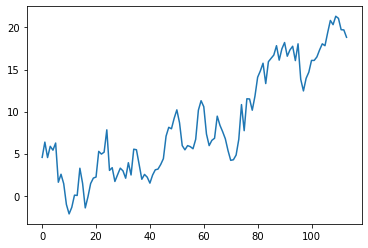

In [16]:
df_res.err.plot()

<AxesSubplot:xlabel='err', ylabel='Count'>

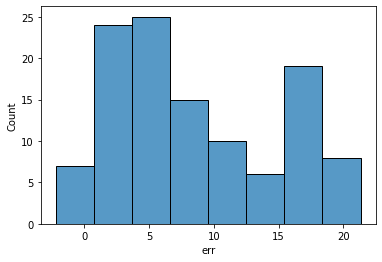

In [17]:
sns.histplot(df_res['err'])

### Box-Jenkins test to check model's goodness

In [18]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m111.resid,lags=[1],return_df=True)['lb_pvalue'].values 
if pvalue < 0.05:
    print("Reject H0. Bad model") 
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Calculate Error terms

In [19]:
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')' 
mse1 = mean_squared_error(df_res.actual, df_res.predicted) 
print(msg + "\n\tMSE= {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARIMA Model. Order=(1,1,1)
	MSE= 113.40936856419013
	RMSE = 10.649383482821442


### Plot actual vs. Predicted values

Text(0.5, 1.0, 'ARIMA Model. Order=(1,1,1)')

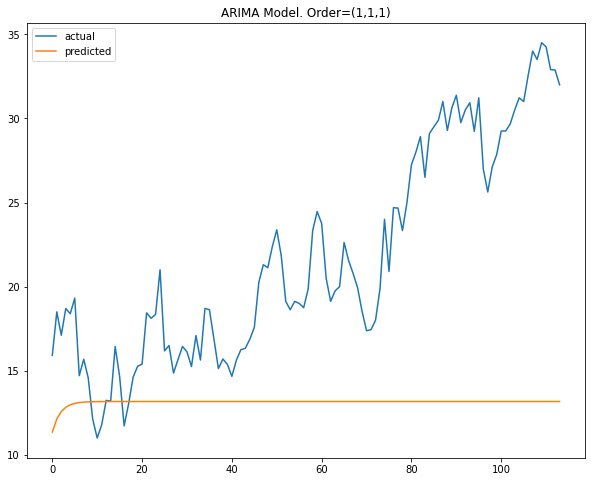

In [20]:
df_res.actual.plot(figsize=(10,8),legend=True) 
df_res.predicted.plot(legend=True) 
plt.title(msg)

### Forecast the future data using the model

In [21]:
fcast= m111.predict(start=len(df), end=len(df)+180, typ='levels')
print(fcast)

2017-01-02    11.354415
2017-01-03    12.130205
2017-01-04    12.574566
2017-01-05    12.829089
2017-01-06    12.974876
                ...    
2017-06-27    13.170340
2017-06-28    13.170340
2017-06-29    13.170340
2017-06-30    13.170340
2017-07-01    13.170340
Freq: D, Name: predicted_mean, Length: 181, dtype: float64


Text(0.5, 1.0, 'ARIMA Model. Order=(1,1,1)')

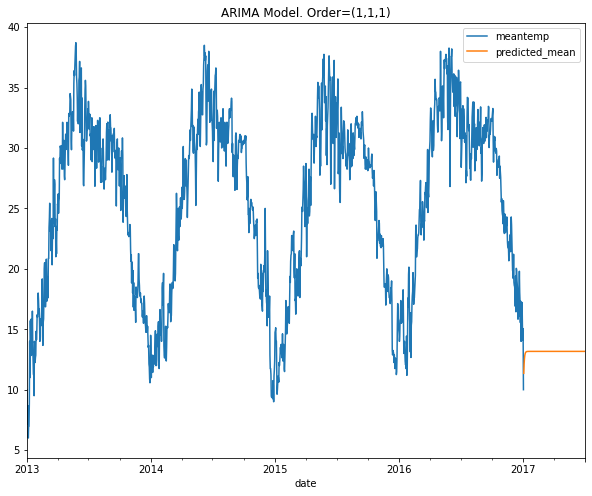

In [22]:
df['meantemp'].plot(figsize=(10,8),legend=True) 
fcast.plot(legend=True) 
plt.title(msg)

# SARIMA Model

In [23]:
from pandas.plotting import autocorrelation_plot  
from pandas.tseries.offsets import DateOffset

## Resampling of data

In [24]:
temp = df.resample('7D').mean()

In [25]:
len(temp)

209

In [26]:
temp

,meantemp,humidity,wind_speed,meanpressure,diff_1
date,,,,,
2013-01-01,7.604762,83.295238,2.903810,1017.685714,-0.500000
2013-01-08,13.176871,66.511905,8.013265,1015.942177,0.833333
2013-01-15,13.409524,80.068027,4.471905,1017.972789,-0.233333
2013-01-22,12.848639,64.748299,4.981973,1019.884694,0.519048
2013-01-29,16.107653,70.279592,3.396378,1016.554592,0.370748
...,...,...,...,...,...
2016-11-29,19.883387,65.384536,4.234881,1017.473212,-0.545455
2016-12-06,18.500047,71.711197,2.837198,1015.210392,0.181818
2016-12-13,17.578005,60.698526,6.974330,1017.191007,-0.293135


In [27]:
temp_test = df1.resample('7D').mean()

In [28]:
len(temp_test)

17

In [29]:
temp_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,17.519937,80.732377,5.174725,878.398882
2017-01-08,13.084503,74.901309,6.566257,1016.843840
2017-01-15,14.446026,75.182729,9.048365,1020.100702
2017-01-22,17.635383,77.398241,8.183621,1019.097168
2017-01-29,16.416198,76.612229,5.577641,1016.751227
2017-02-05,16.001734,69.085860,7.107659,1015.800313
2017-02-12,18.529252,66.069898,6.641417,1019.071712
2017-02-19,20.492424,55.205164,10.812469,1011.957483
2017-02-26,21.399267,50.977106,6.890214,1012.204884


## Data Exploration

### Decomposition

Text(0.5, 1.0, 'Random')

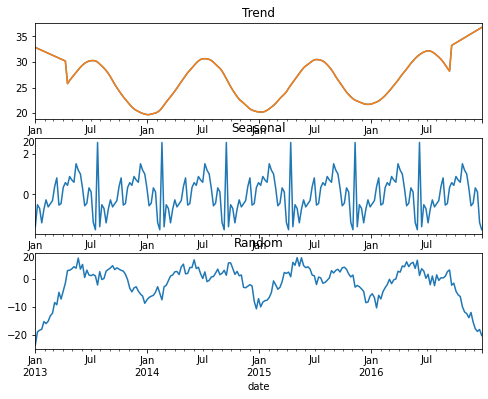

In [30]:
fig,ax = plt.subplots(3,1,figsize=(20,12)) 
result =seasonal_decompose(temp['meantemp'], period=30, extrapolate_trend='freq') 
result.trend.plot(figsize=(8,6),ax=ax[0]) 
result.trend.plot(ax=ax[0]) 
ax[0].set_title("Trend")
result.seasonal.plot(ax=ax[1]) 
ax[1].set_title("Seasonal")
result.resid.plot(ax=ax[2]) 
ax[2].set_title("Random")

<AxesSubplot:xlabel='date'>

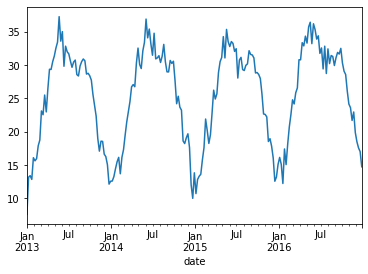

In [31]:
temp['meantemp'].plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

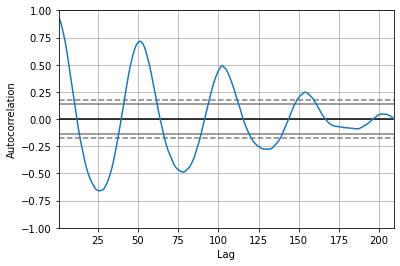

In [32]:
# auto correlation plot
autocorrelation_plot(temp['meantemp'])

### Check for Stationarity

In [33]:
checkStationarity(temp['meantemp'])

'p-value=4.546783714952827e-05. Data is stationary'

## Plotting ACF and PACF

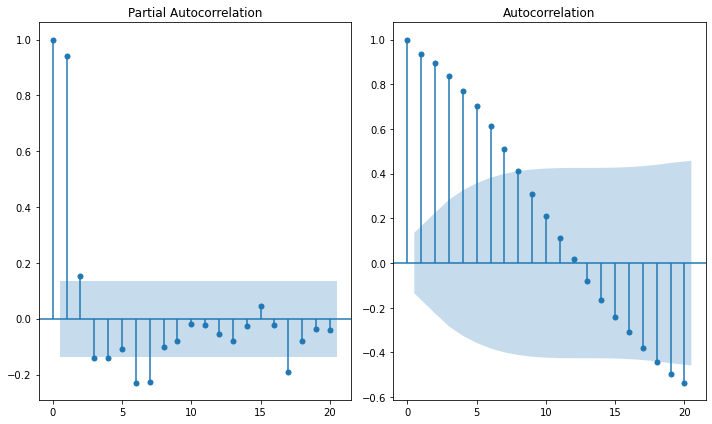

In [34]:
fig,ax=plt.subplots(1,2,figsize=(10,6)) 

# plot PACF (p) 
plot_pacf(temp['meantemp'].dropna(),lags=20,ax=ax[0])
 
# plot ACF (q)  
plot_acf(temp['meantemp'].dropna(),lags=20,ax=ax[1])

plt.tight_layout()

### Model building(SARIMA)

In [35]:
r=df1[2:]
r=r.resample('7D').mean()

In [36]:
p=1; q=1; d=1
model_sarima= sm.tsa.statespace.SARIMAX(temp['meantemp'],order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
print(model_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           meantemp   No. Observations:                  209
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -440.529
Date:                            Wed, 02 Feb 2022   AIC                            891.057
Time:                                    14:53:33   BIC                            907.448
Sample:                                01-01-2013   HQIC                           897.693
                                     - 12-27-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6216      0.329     -1.891      0.059      -1.266       0.023
ma.L1          0.4808      0.372   

### Use the model for Predictions 

In [37]:
predictions = model_sarima.predict(start=r.index[0],end=r.index[-1],dynamic=True)

### Collate actual, predicted, and error values

In [38]:
df_res = pd.DataFrame({'actual':r.meantemp,'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

               actual  predicted        err
2017-01-03  16.926022  15.016556   1.909466
2017-01-10  13.202952  14.123717  -0.920765
2017-01-17  15.227864  15.154929   0.072935
2017-01-24  17.000164  15.351565   1.648598
2017-01-31  16.903249  14.925027   1.978221
2017-02-07  15.582143  14.819748   0.762395
2017-02-14  20.408581  14.662468   5.746113
2017-02-21  19.476190  15.183154   4.293037
2017-02-28  21.559982  16.091828   5.468154
2017-03-07  19.749492  16.148699   3.600793
2017-03-14  22.209615  15.704247   6.505369
2017-03-21  27.752381  16.242493  11.509888
2017-03-28  30.346372  16.011701  14.334670
2017-04-04  28.427638  15.403495  13.024143
2017-04-11  30.492063  16.080491  14.411573
2017-04-18  33.432143  16.261759  17.170384


### Calculate Error terms

In [39]:
mse1=mean_squared_error(df_res.actual,df_res.predicted)
print("\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

	MSE = 72.4031237175091
	RMSE = 8.50900251013649


### Plot actual vs. Predicted values

<AxesSubplot:>

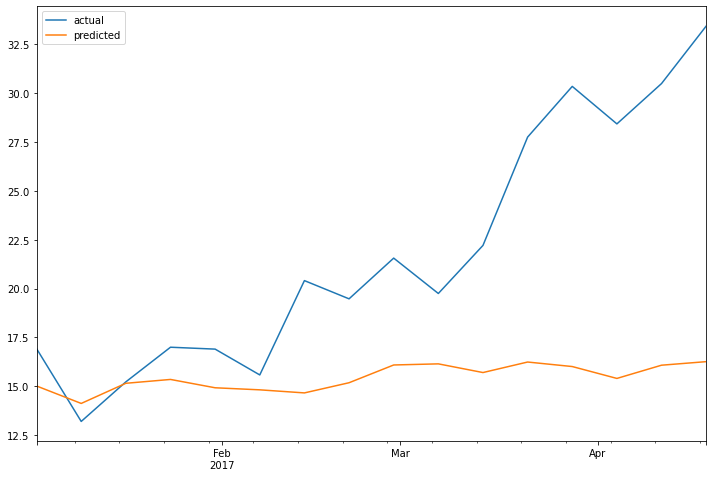

In [40]:
df_res[['actual','predicted']].plot(figsize=(12,8)) 

In [41]:
fcast = model_sarima.predict(start=len(temp), end=len(temp)+30, typ='levels').rename('Forecast')
print(fcast)

2017-01-03    15.016556
2017-01-10    14.123717
2017-01-17    15.154929
2017-01-24    15.351565
2017-01-31    14.925027
2017-02-07    14.819748
2017-02-14    14.662468
2017-02-21    15.183154
2017-02-28    16.091828
2017-03-07    16.148699
2017-03-14    15.704247
2017-03-21    16.242493
2017-03-28    16.011701
2017-04-04    15.403495
2017-04-11    16.080491
2017-04-18    16.261759
2017-04-25    15.765701
2017-05-02    15.601328
2017-05-09    15.497061
2017-05-16    15.836983
2017-05-23    16.611837
2017-05-30    16.621443
2017-06-06    16.167237
2017-06-13    16.554867
2017-06-20    16.350081
2017-06-27    15.727302
2017-07-04    16.422978
2017-07-11    16.605419
2017-07-18    16.112923
2017-07-25    15.951887
2017-08-01    15.844663
Freq: 7D, Name: Forecast, dtype: float64


<AxesSubplot:xlabel='date'>

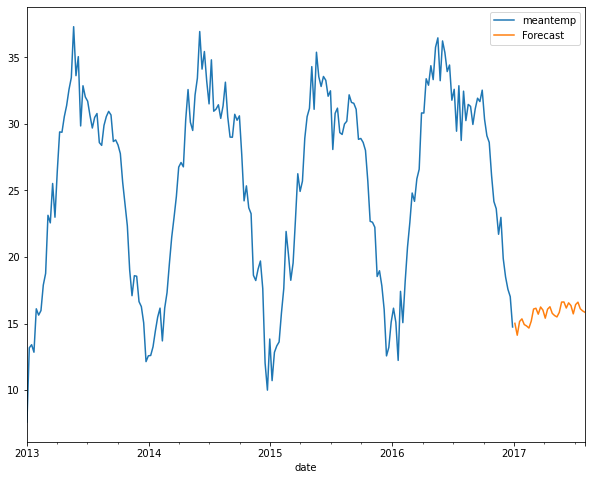

In [42]:
temp['meantemp'].plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)

# SARIMA  Model

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(temp['meantemp'], order=(1,1,1), seasonal_order=(1,1,1,7)).fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          meantemp   No. Observations:                  209
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -445.826
Date:                           Wed, 02 Feb 2022   AIC                            901.651
Time:                                   14:53:34   BIC                            918.168
Sample:                               01-01-2013   HQIC                           908.334
                                    - 12-27-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5701      0.353     -1.617      0.106      -1.261       0.121
ma.L1          0.4366      0.383      1.139

### Use the model for Predictions 

In [44]:
forecast = model.forecast(len(temp_test)) 
forecast

2017-01-03    15.255809
2017-01-10    14.789695
2017-01-17    14.920290
2017-01-24    14.343071
2017-01-31    14.559031
2017-02-07    14.557713
2017-02-14    14.318728
2017-02-21    14.751195
2017-02-28    14.298625
2017-03-07    14.630292
2017-03-14    14.185704
2017-03-21    14.475571
2017-03-28    14.544849
2017-04-04    14.486172
2017-04-11    14.917088
2017-04-18    14.462342
2017-04-25    14.814790
Freq: 7D, Name: predicted_mean, dtype: float64

### Plot actual vs. Predicted values

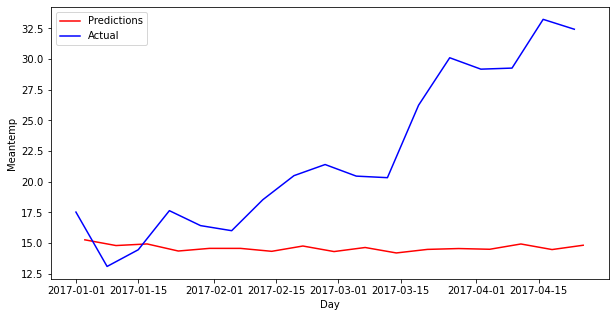

In [45]:
plt.figure(figsize=(10,5)) 
plt.plot(forecast, 'r', label = 'Predictions') 
plt.plot(temp_test.meantemp, 'b', label='Actual') 
plt.xlabel('Day') 
plt.ylabel('Meantemp') 
plt.legend() 

### Calculate Error terms

In [46]:
mse1 = mean_squared_error(temp_test.meantemp,forecast) 
print('RMSE: ' + str(np.sqrt(mse1) ))

RMSE: 9.891049382642825


### Split Exogenous data into train and test parts

In [47]:
exog_train = temp[['humidity','wind_speed','meanpressure']] 
exog_test =temp_test[['humidity','wind_speed','meanpressure']]
print('exog_train = {}, train = {}'.format( len(exog_train), len(temp)))

exog_train = 209, train = 209


### Build the SARIMAX model

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_exo = SARIMAX(temp.meantemp,order=(2,0,1),seasonal_order=(1,0,0,30),exog = exog_train.values).fit()
print(model_exo.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  209
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 30)   Log Likelihood                -410.116
Date:                             Wed, 02 Feb 2022   AIC                            836.232
Time:                                     14:53:36   BIC                            862.970
Sample:                                 01-01-2013   HQIC                           847.042
                                      - 12-27-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1471      0.016     -8.922      0.000      -0.179      -0.115
x2            -0.1401      

### Forecast using the model

In [49]:
forecast_exo = model_exo.forecast(len(temp_test), exog=exog_test.values) 
forecast_exo

2017-01-03    15.251272
2017-01-10    15.756882
2017-01-17    15.252445
2017-01-24    15.105925
2017-01-31    15.492022
2017-02-07    16.450582
2017-02-14    16.809874
2017-02-21    17.958438
2017-02-28    18.969344
2017-03-07    18.332193
2017-03-14    18.529351
2017-03-21    19.182418
2017-03-28    20.315364
2017-04-04    21.277096
2017-04-11    22.106776
2017-04-18    21.543534
2017-04-25    21.697367
Freq: 7D, Name: predicted_mean, dtype: float64

### Plot actual vs. Predicted values

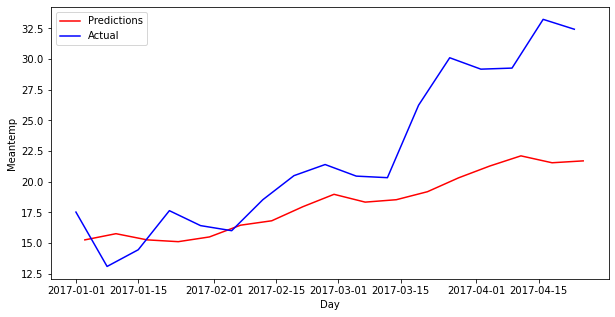

In [50]:
plt.figure(figsize=(10,5)) 
plt.plot(forecast_exo, 'r', label = 'Predictions') 
plt.plot(temp_test.meantemp, 'b', label='Actual') 
plt.xlabel('Day') 
plt.ylabel('Meantemp')
plt.legend() 

### Calculate Error terms

In [51]:
mse1 = mean_squared_error(temp_test.meantemp,forecast_exo) 
print('RMSE: ' + str(np.sqrt(mse1) ))

RMSE: 5.7143348856676095


# Observations and Conclusion:

ARMA Model(1,0,1):  
    AIC  1082.418  
    RMSE: 3.808987441975948     
        
ARIMA Model(1,1,1):  
    AIC 5542.478  
    RMSE  10.649383482821442 
    
SARIMA Model:  
    AIC 891.057  
    RMSE = 8.50900251013649    
    
SARIMA Model:  
    AIC  901.651  
    RMSE 9.891049382642825    
    
SARIMAX Model:  
    AIC  836.232  
    RMSE 5.7143348856676095    

SARIMAX using exogenous has least AIC and RMSE values